In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./digit_data.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = pd.get_dummies(data["label"], dtype=int)

In [5]:
data_encoded = pd.concat([data,df], axis = 1)

In [6]:
data_encoded = data_encoded.drop(["label"], axis =1)

In [7]:
data_encoded

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
data_test[:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
data_test = data_encoded[:1000]
data_test.shape
test_y = data_test.iloc[:, 784:]
test_x = data_test.iloc[:,:784]

In [97]:
data_train = data_encoded[1000:]
data_test.shape
train_y = data_train.iloc[:, 784:]
train_x = data_train.iloc[:,:784]
train_x = np.array(train_x)
train_y = np.array(train_y)

Text(0.5, 1.0, 'The number is 8')

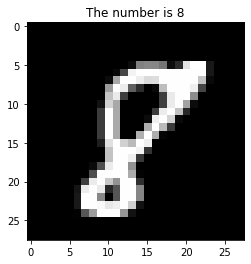

In [13]:
index = int(np.random.random() * data_encoded.shape[0])
plt.imshow(np.array(data.iloc[index, 1:]).reshape((28,28)), cmap="gray")
plt.title(f"The number is {data.iloc[index,0]}")

In [44]:
def initialize_parameters(layer_dims):
    """Layer dims contains the dimension of each layer in the neural network"""
    parameters = {}

    num_layers = len(layer_dims) # as the input layer is taken as 0
    for i in range(1, num_layers):
        parameters[f"W{i}"] = (np.random.random((layer_dims[i-1], layer_dims[i])) - 0.5).T
        parameters[f"b{i}"] = (np.random.random((1, layer_dims[i])) - 0.5).T

    return parameters

In [15]:
def relu(z):
    return np.maximum(0, z)

In [16]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True)) # For numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [120]:
def forward_pass(X, parameters, dropout_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    print(W1.shape, X.shape)
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    # Apply dropout to the hidden layer activations
    dropout_mask = (np.random.rand(*A1.shape) < 1 - dropout_rate)
    A1 *= dropout_mask / (1 - dropout_rate)

    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [73]:
def predict(X, parameters):
    _, _, _, A2 = forward_pass(X, parameters)
    return np.argmax(A2, axis=0)

In [19]:
def backward_pass(X, Y, parameters, cache):
    m = Y.shape[1]
    Z1, A1, Z2, A2 = cache
    W1, _, W2, _ = parameters

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)  # Derivative of ReLU
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return gradients

In [145]:
def cross_entropy_loss(Y_pred, Y_true):
    m = Y_true.shape[1]
    loss = -np.sum(Y_true * np.log(Y_pred + 1e-8)) / m
    return loss

In [20]:
def update_parameters(parameters, gradients, learning_rate):
    W1, b1, W2, b2 = parameters
    dW1, db1, dW2, db2 = gradients

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [41]:
def train(X, Y, hidden_size, output_size, learning_rate, epochs, dropout_rate):
    input_size = X.shape[0]
    parameters = initialize_parameters([input_size, hidden_size, output_size])

    for epoch in range(epochs):
        cache = forward_pass(X, parameters, dropout_rate)
        loss = cross_entropy_loss(cache[3], Y)
        gradients = backward_pass(X, Y, parameters, cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters

In [68]:
train_x.shape

(1000, 784)

In [122]:
input_size = train_x.shape[1]
output_size = train_y.shape[1]
hidden_size = 10
learning_rate = 0.01
epochs = 1000

parameters = initialize_parameters([input_size, hidden_size, output_size])


# transpose the training parameters

forward_pass(train_x.T, parameters, 0.3)

(10, 784) (784, 41000)


(array([[ -687.74352745,  -695.9378141 ,  -409.55346977, ...,
          -112.53779511,  -640.12174795,  -491.574558  ],
        [  407.88843939,   272.05004914,   860.36193288, ...,
          1379.68864613,  1624.66689098,   732.66442198],
        [ -169.69198749,  -722.41338368, -1161.11734581, ...,
          -816.18026519,  -778.50246926,  -588.90081463],
        ...,
        [  808.21204184,  -522.07792556,   928.11271187, ...,
           413.45117459,   661.74368221,  -366.86190109],
        [   35.08987755,  -450.88169188,  -281.21731787, ...,
           122.0498586 ,  -715.4686728 ,  -293.03743139],
        [  256.12719114,   445.57442364,   541.18148318, ...,
           912.70914251,   -46.37188159,   932.35805584]]),
 array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
            0.        ,    0.        ],
        [ 582.69777056,  388.64292734,    0.        , ...,    0.        ,
         2320.9527014 , 1046.66345997],
        [   0.        ,    0.        